# Bell Szekeres Solution and Related Solutions of the Einstein Maxwell Equations Barrabes & Hogan
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://arxiv.org/abs/gr-qc/0608087

http://213.230.96.51:8090/files/ebooks/Fizika/Griffiths%20J.B.%20Colliding%20plane%20waves%20in%20general%20relativity%20(OUP,%201991)(ISBN%200198532091)(254s)%20PGr%20.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy,U,V,M = symbols( 'u v x y du dv dx dy U V M' ) 

In [4]:
U = Function('U')(u,v)
U

In [5]:
V = Function('V')(u,v)
V

In [6]:
L = Function('L')(u,v)
L

In [7]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [9]:
lineElement = expand( -exp(-U) * ( exp(V)*dx**2 + exp(-V)*dy**2 ) + 2*exp(-L)*du*dv ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -L(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -L(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡            -L(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -L(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                          
⎢⎡ ∂                                                                                                                       
⎢⎢-──(L(u, v))  0                              0                                                           0               
⎢⎢ ∂u                                                                                                                      
⎢⎢                                                                                                                         
⎢⎢     0        0                              0                                                           0               
⎢⎢                                                                                                                         
⎢⎢                 ⎛  ∂             ∂          ⎞  L(u, v) - U(u, v) + V(u, v)                                              
⎢⎢      

In [17]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡                                             2                               2                                            
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂           ∂             ∂      
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──(U(u, v))⋅──(U(u, v))   ──(V(u,
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u          ∂v            ∂u     
⎢      ──(L(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ─────────────────────── - ───────
⎢      ∂u          ∂u                  2            2                  2                             2                     
⎢                                                 ∂u                                                                       
⎢                                                                                                                          
⎢       

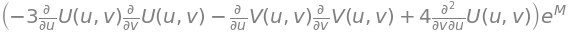

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                                                  
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                   
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                                                  2
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                     ∂           ∂               ∂ 
⎢──(L(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0⋅──(U(u, v))⋅──(U(u, v)) - ────
⎢∂u          ∂u                  2            2                  2                           ∂u          ∂v            ∂v ∂
⎢                                           ∂u                                                                             
⎢                                                                                                                          
⎢       

In [36]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             

In [ ]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

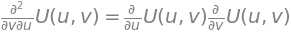

In [25]:
equation2pt4 = Eq(diff(U,u,v),solve( einst.tensor()[1,0] , diff(U,u,v) )[0] )
equation2pt4 

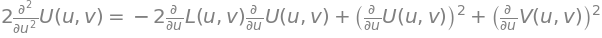

In [32]:
equation2pt5 = Eq(2*diff(U,u,u),2*solve( simplify(Ric.tensor())[0,0], diff(U,u,u) )[0] )
equation2pt5

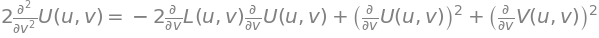

In [38]:
equation2pt6 = Eq( 2*diff(U,v,v),2*solve( einst.tensor()[1,1], diff(U,v,v))[0] ) 
equation2pt6

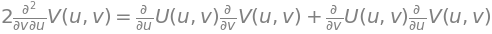

In [81]:
equation2pt7 =Eq(2*diff(V,u,v),2*solve( simplify(Ric.tensor())[2,2].args[0] - simplify(Ric.tensor())[3,3].args[0] , diff(V,u,v) )[0] )
equation2pt7 

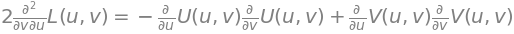

In [94]:
equation2pt8 = Eq(2*diff(L,u,v),2*solve( simplify(Ric.tensor())[1,0], diff(L,u,v) )[0]).subs(equation2pt4.args[0],equation2pt4.args[1])
equation2pt8

In [96]:
fieldEquations = Matrix([equation2pt4 ,equation2pt5 ,equation2pt6 ,equation2pt7 ,equation2pt8 ])
fieldEquations

⎡                      2                                                       ⎤
⎢                     ∂              ∂           ∂                             ⎥
⎢                   ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                   ⎥
⎢                   ∂v ∂u            ∂u          ∂v                            ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(L(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟  + ⎜──(V(u, v))⎟ ⎥
⎢    2                ∂u          ∂u            ⎝∂u         ⎠    ⎝∂u         ⎠ ⎥
⎢  ∂u                                                                          ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂     